# Mushroom Dataset

# Aim: Classify whether the mushrooms are edible or poisonous

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#checking working directory
import os
os.getcwd()

'C:\\Users\\user'

In [3]:
#Loading train and test data
train=pd.read_csv(r"C:\Users\user\Desktop\mushroom_train.csv")
test=pd.read_csv(r"C:\Users\user\Desktop\mushroom_test.csv")

In [4]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [5]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [9]:
print("The size of train data is ",train.shape)
print("The size of test data is ",test.shape)

The size of train data is  (5686, 25)
The size of test data is  (2438, 24)


# Variable Identification and their types

In [10]:
#A peek at data
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [14]:
categorical=train.dtypes[train.dtypes=='object']
continuous=train.dtypes[train.dtypes=='int64']
print("Categorical Features: "+str([i[0] for i in categorical.iteritems()]))
print("\nContinuous Features: "+str([i[0] for i in continuous.iteritems()]))
print("\nTarget Variable: "+str([train.columns[0]]))

Categorical Features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Continuous Features: ['radius', 'weight']

Target Variable: ['class']


As per the description of the features above.
It seems that only 2 are continuous features while the rest are categorical.
So, we will encode the categorical features.
But first,let's see if there are any missing values.

In [15]:
#checking for missing values
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

It seems that are no missing values

# Univariate Analysis

In [16]:
#For Categorical Variables we use count for analysis
for var in categorical.iteritems():
    print(var[0])
    print 
    counts = train[var[0]].value_counts()
    totalCounts = sum([x[1] for x in counts.iteritems()])
    for name,val in counts.iteritems():
        print("%.2f%%"%((val*1.0/totalCounts)*100.0),name,"(%d)"%(val))
    print

class
51.79% e (2945)
48.21% p (2741)
cap-shape
45.34% x (2578)
38.32% f (2179)
10.38% k (590)
5.49% b (312)
0.40% s (23)
0.07% c (4)
cap-surface
40.36% y (2295)
31.01% s (1763)
28.56% f (1624)
0.07% g (4)
cap-color
28.14% n (1600)
22.72% g (1292)
18.47% e (1050)
13.30% y (756)
12.66% w (720)
1.97% b (112)
1.83% p (104)
0.56% c (32)
0.21% u (12)
0.14% r (8)
bruises
58.00% f (3298)
42.00% t (2388)
odor
43.74% n (2487)
26.40% f (1501)
7.23% s (411)
7.00% y (398)
4.92% l (280)
4.75% a (270)
3.31% p (188)
2.23% c (127)
0.42% m (24)
gill-attachment
97.64% f (5552)
2.36% a (134)
gill-spacing
83.87% c (4769)
16.13% w (917)
gill-size
69.10% b (3929)
30.90% n (1757)
gill-color
21.10% b (1200)
18.75% p (1066)
14.84% w (844)
12.80% n (728)
9.32% h (530)
9.25% g (526)
6.00% u (341)
4.73% k (269)
1.23% e (70)
0.98% y (56)
0.69% o (39)
0.30% r (17)
stalk-shape
56.70% t (3224)
43.30% e (2462)
stalk-root
46.87% b (2665)
30.37% ? (1727)
13.72% e (780)
6.72% c (382)
2.32% r (132)
stalk-surface-above-rin

In [17]:
#For Continuous Variables we use describe
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


# Bivariate Analysis

In [18]:
#For Categorical-Categorical we use CROSSTAB
alreadyDone = []
for i in categorical.iteritems():
    for j in categorical.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print(pd.crosstab(index=train[i[0]],columns=train[j[0]]))
            print

cap-shape    b  c     f    k   s     x
class                                 
e          278  0  1094  161  23  1389
p           34  4  1085  429   0  1189
cap-surface     f  g    s     y
class                          
e            1090  0  790  1065
p             534  4  973  1230
cap-color   b   c    e    g    n   p  r   u    w    y
class                                                
e          33  24  453  728  872  42  8  12  497  276
p          79   8  597  564  728  62  0   0  223  480
bruises     f     t
class              
e        1004  1941
p        2294   447
odor     a    c     f    l   m     n    p    s    y
class                                              
e      270    0     0  280   0  2395    0    0    0
p        0  127  1501    0  24    92  188  411  398
gill-attachment    a     f
class                     
e                121  2824
p                 13  2728
gill-spacing     c    w
class                  
e             2106  839
p             2663   78
gill-siz

Correlation between radius and weight is -0.01


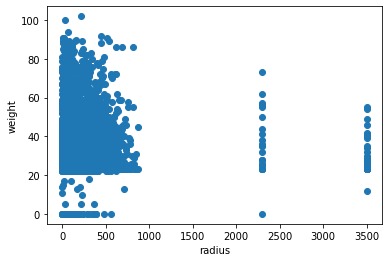

In [19]:
#For Continuous-Continuous we use Scatter Plot and Correlation
alreadyDone = []
for i in continuous.iteritems():
    for j in continuous.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print("Correlation between %s and %s is %.2f"%(i[0],j[0],train[i[0]].corr(train[j[0]])))
            plt.scatter(train[i[0]],train[j[0]])
            plt.xlabel("%s"%(i[0]))
            plt.ylabel("%s"%(j[0]))
            plt.show()

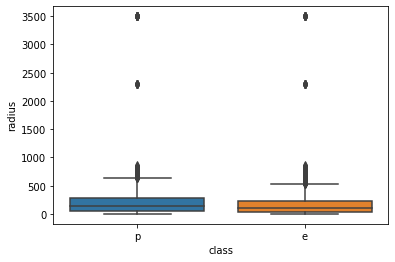

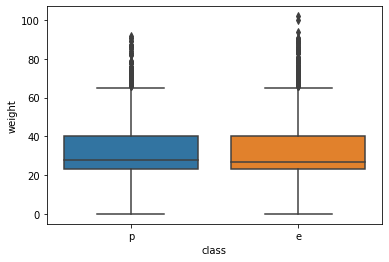

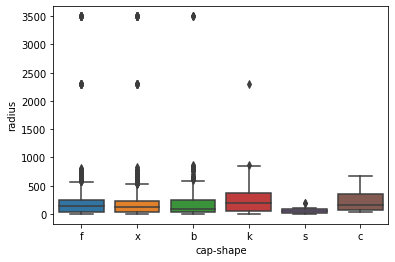

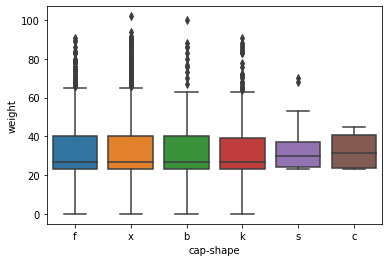

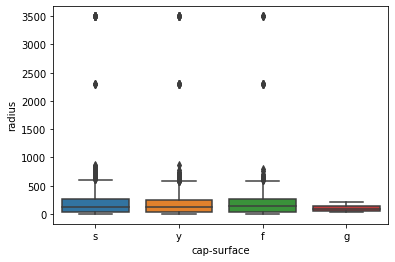

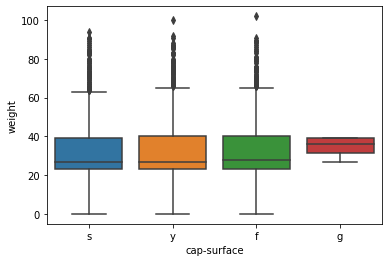

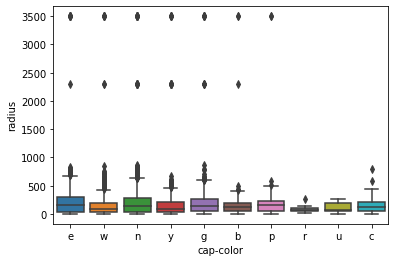

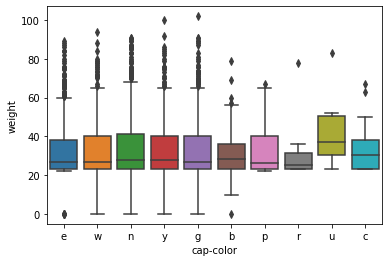

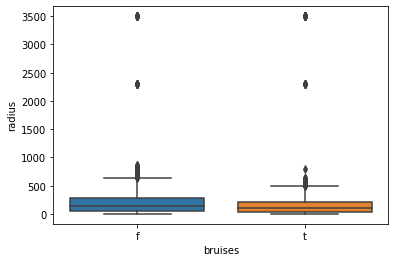

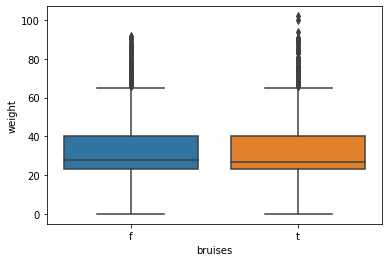

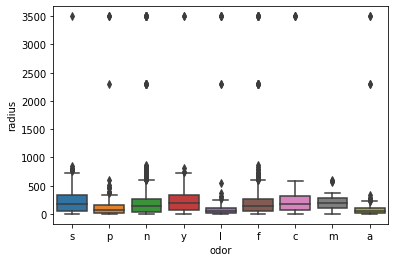

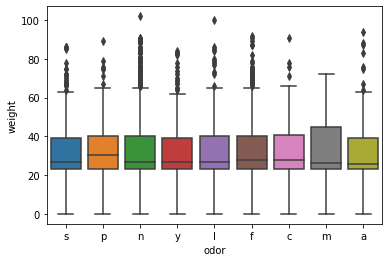

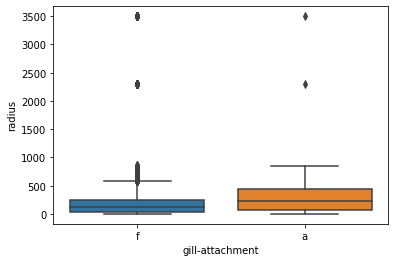

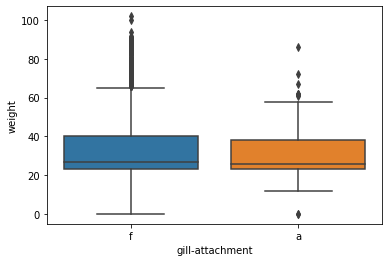

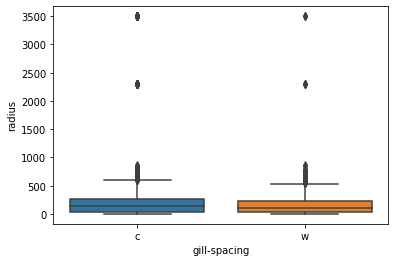

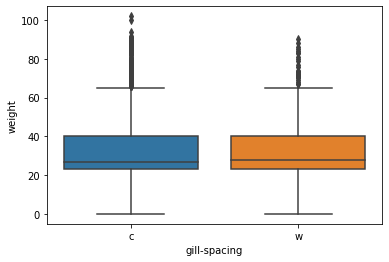

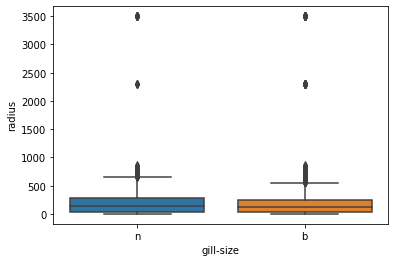

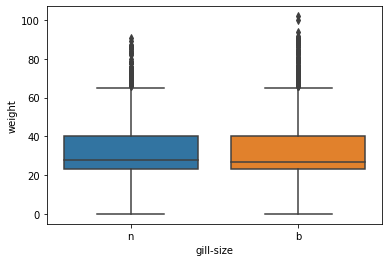

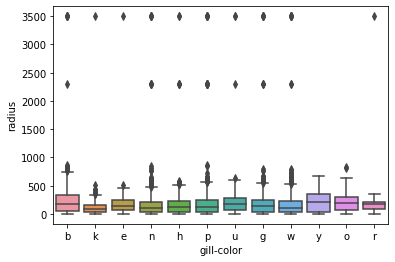

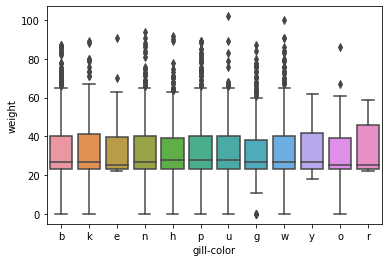

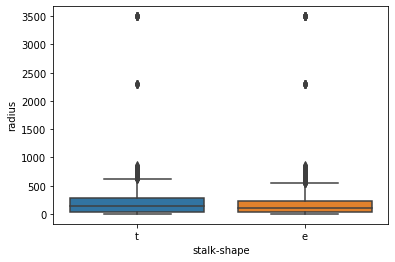

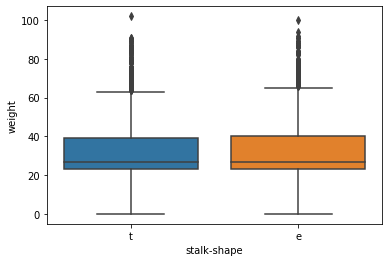

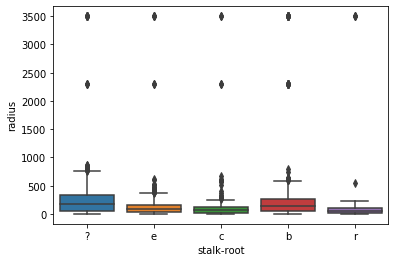

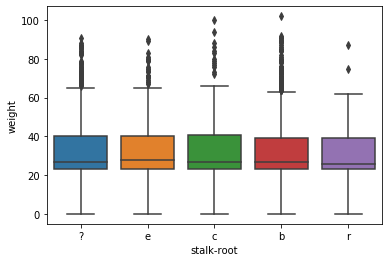

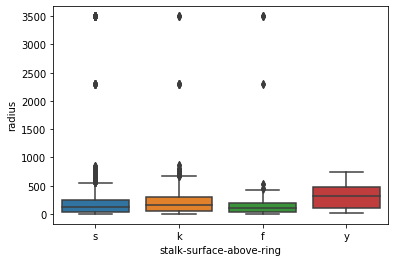

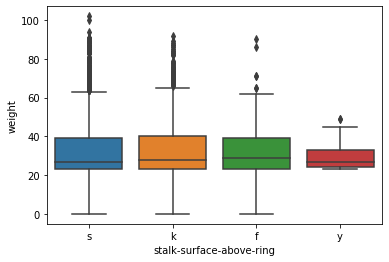

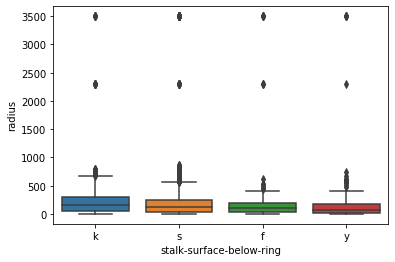

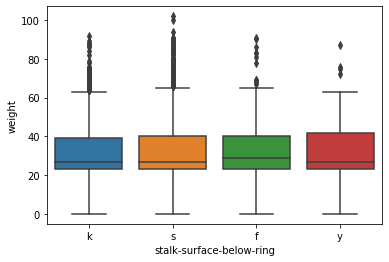

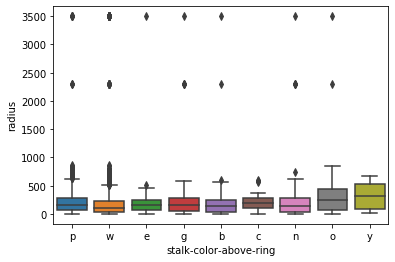

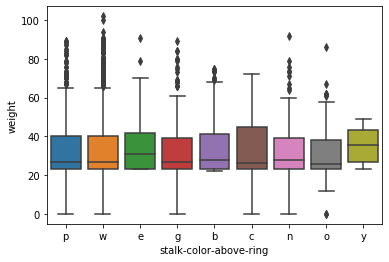

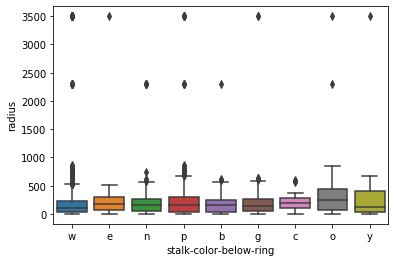

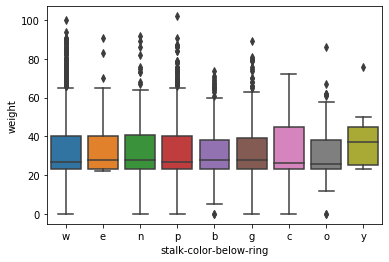

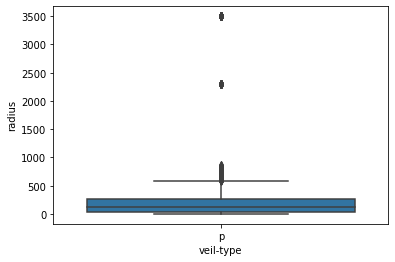

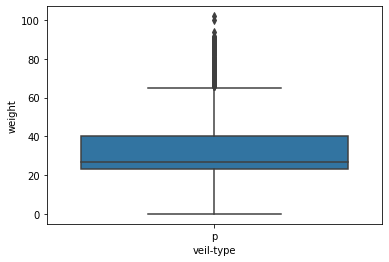

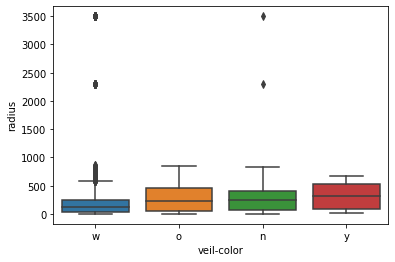

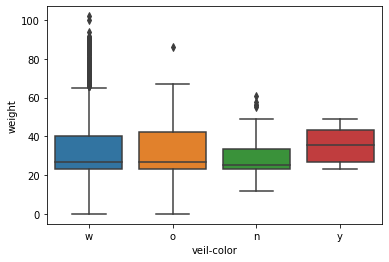

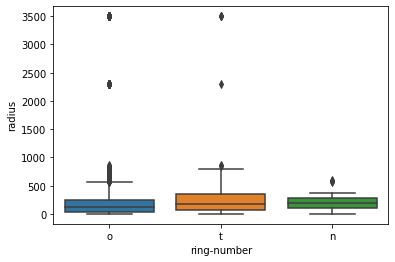

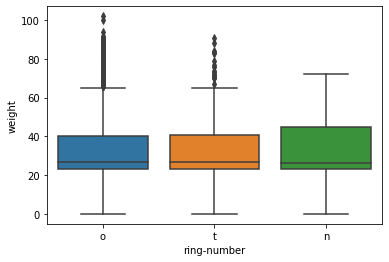

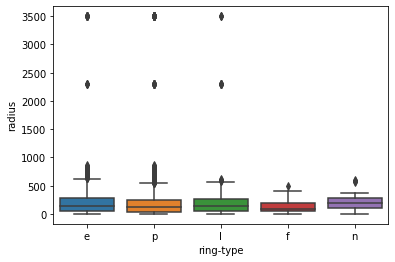

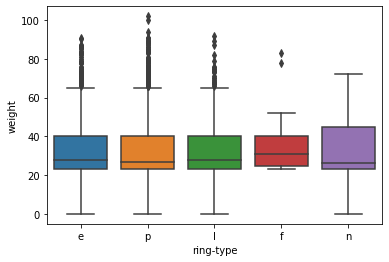

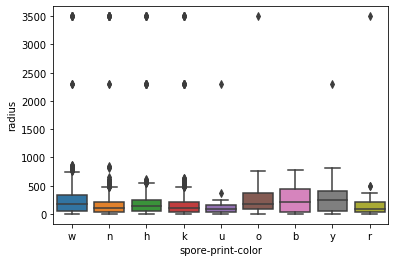

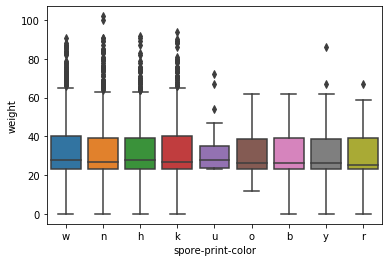

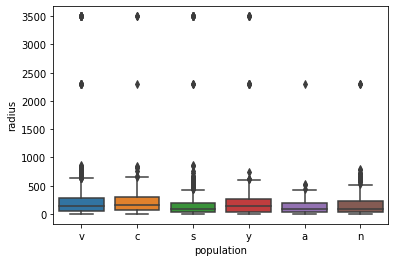

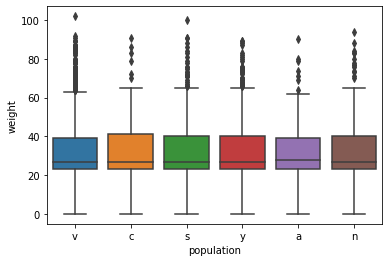

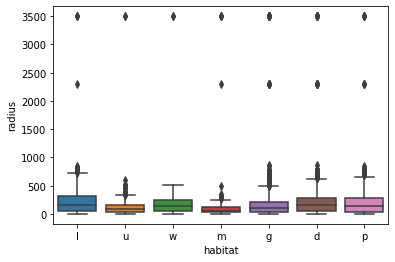

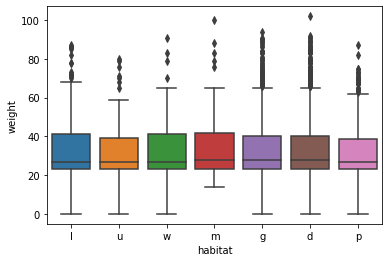

In [20]:
#For Categorical-Continuous we use Box Plot

for i in categorical.iteritems():
    for j in continuous.iteritems():
        sns.boxplot(train[i[0]],train[j[0]])
        plt.show()

# Label Encoder

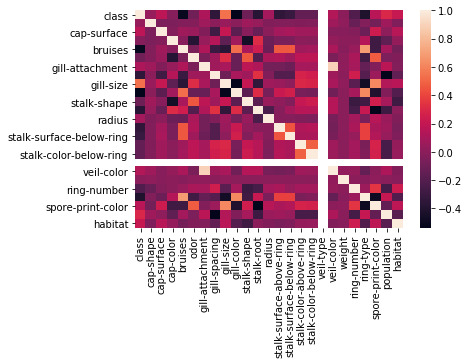

In [41]:
#A correlation between variables
sns.heatmap(train.corr())

In [22]:
#Encoding the train and test data
le=LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])

In [23]:
#Splitting the train and test data for better performance
X=train.iloc[:,1:]
y=train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [25]:
#checking the size of the data
for data in [X_train,X_test,y_train,y_test]:
    print(data.shape)

(3809, 24)
(1877, 24)
(3809,)
(1877,)


# Building our ML Pipeline

# Without Important Fearure Selection

# Logistic Regression

In [26]:
#Fitting our Model
model1=LogisticRegression()
model1.fit(X_train,y_train)
#Checking accuracy on train
LR_acc_train=accuracy_score(model1.predict(X_train),y_train)
#checking accuracy on test set
LR_acc_test=accuracy_score(model1.predict(X_test),y_test)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
print("Accuracy Score on Train Set for Logistic Regression: ",LR_acc_train*100)
print("Accuracy Score on Test Set for Logistic Regression: ",LR_acc_test*100)

Accuracy Score on Train Set for Logistic Regression:  92.28143869782095
Accuracy Score on Test Set for Logistic Regression:  90.5167820990943


# Decision Tree

In [29]:
#Fitting our Model
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
#Checking accuracy on train
DT_acc_train=accuracy_score(model2.predict(X_train),y_train)
#checking accuracy on test set
DT_acc_test=accuracy_score(model2.predict(X_test),y_test)

In [30]:
print("Accuracy Score on Train Set for Decision Tree: ",DT_acc_train*100)
print("Accuracy Score on Test Set for Decision Tree: ",DT_acc_test*100)

Accuracy Score on Train Set for Decision Tree:  100.0
Accuracy Score on Test Set for Decision Tree:  100.0


# Random Forest Classifier

In [31]:
#Fitting our Model
model3=RandomForestClassifier(n_estimators=10)
model3.fit(X_train,y_train)
#Checking accuracy on train
RFC_acc_train=accuracy_score(model3.predict(X_train),y_train)
#checking accuracy on test set
RFC_acc_test=accuracy_score(model3.predict(X_test),y_test)

In [32]:
print("Accuracy Score on Train Set for Random Forest: ",RFC_acc_train*100)
print("Accuracy Score on Test Set for Random Forest: ",RFC_acc_test*100)

Accuracy Score on Train Set for Random Forest:  100.0
Accuracy Score on Test Set for Random Forest:  100.0


# SVM

In [33]:
#Fitting our Model
model4=SVC()
model4.fit(X_train,y_train)
#Checking accuracy on train
SVM_acc_train=accuracy_score(model4.predict(X_train),y_train)
#checking accuracy on test set
SVM_acc_test=accuracy_score(model4.predict(X_test),y_test)

In [34]:
print("Accuracy Score on Train Set for SVM: ",SVM_acc_train*100)
print("Accuracy Score on Test Set for SVM: ",SVM_acc_test*100)

Accuracy Score on Train Set for SVM:  75.40036755053819
Accuracy Score on Test Set for SVM:  74.10761854022377


# Cross Validation Score for the above Algorithms

In [35]:
from sklearn.model_selection import cross_val_score
print("Random Forests: ")
print(cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

print("\n\nSVM:")
print(cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)
 
print("\n\nLog:")
print(cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)

print("\n\nDecision Tree:")
print(cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Decision Tree is: " , accuracy)

Random Forests: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of Random Forests is:  100.0


SVM:
[0.72703412 0.73490814 0.70866142 0.70341207 0.72440945 0.72965879
 0.75853018 0.71653543 0.75590551 0.77368421]
Accuracy of SVM is:  73.32739328636552


Log:


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

[0.93700787 0.91076115 0.92125984 0.92388451 0.89501312 0.92650919
 0.92388451 0.92913386 0.95013123 0.92894737]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Accuracy of SVM is:  92.46532670258324


Decision Tree:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of Decision Tree is:  100.0


# Making Predictions on Test Data

In [37]:
l=LabelEncoder()
for col in test.columns:
    test[col] = l.fit_transform(test[col])
test['prediction']=model3.predict(test)
print("Edible:",test['prediction'].value_counts()[0]*100.0/test.shape[0])
print("Poisonous:",test['prediction'].value_counts()[1]*100.0/test.shape[0])

Edible: 51.804757998359314
Poisonous: 48.195242001640686


# Feature Importance

# Since, Random Forest performs the best on the cross validation data.

We shall use it RFC for feature selection

Feature ranking:
1. feature gill-spacing (0.182809)
2. feature ring-type (0.127419)
3. feature gill-size (0.107922)
4. feature bruises (0.091770)
5. feature cap-color (0.074507)
6. feature spore-print-color (0.070340)
7. feature stalk-shape (0.053991)
8. feature gill-attachment (0.049971)
9. feature ring-number (0.046956)
10. feature radius (0.045225)
11. feature population (0.031206)
12. feature gill-color (0.024288)
13. feature stalk-surface-above-ring (0.023106)
14. feature stalk-color-above-ring (0.019617)
15. feature cap-shape (0.015166)
16. feature stalk-surface-below-ring (0.014619)
17. feature cap-surface (0.009627)
18. feature weight (0.002625)
19. feature class (0.002322)
20. feature odor (0.002278)
21. feature veil-type (0.001922)
22. feature stalk-root (0.001856)
23. feature veil-color (0.000458)
24. feature stalk-color-below-ring (0.000000)


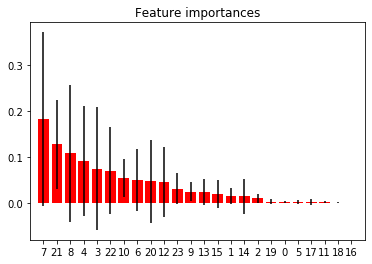

In [38]:
importances=model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Thus, it can be seen that all features are not important.
gill-spacing and bruises are highly influencing the poisonous state of mushrooms
whereas features like stalk-root, veil-color,stalk-color-below-ring are almost useless in prediction
So, we will again make predictions using important features

# Building our ML Pipeline with important features

In [39]:
#Selecting important features
predictors=['gill-spacing','bruises','spore-print-color','ring-type','gill-size'
,'ring-number','stalk-surface-above-ring','radius','population','cap-color',
'gill-attachment','stalk-shape','cap-surface']
data_train=X_train[predictors]
data_test=X_test[predictors]

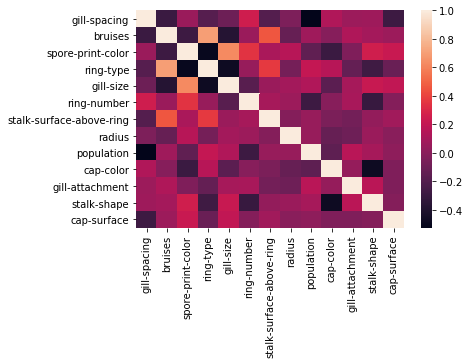

In [40]:
##A correlation between new variables
sns.heatmap(data_train.corr())

# Fitting all Models and Checking the CV score

In [43]:
models=[LogisticRegression(),DecisionTreeClassifier(random_state=0),RandomForestClassifier(n_estimators=10),SVC()]
model_names=['LR','DT','RFC','SVM']
for model in models:
    print("\n\n%s:"%model_names[models.index(model)])
    print(cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10))
    accuracy = cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy of %s is: %f"%(model_names[models.index(model)],accuracy))



LR:


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

[0.92388451 0.9343832  0.92913386 0.92125984 0.92913386 0.94488189
 0.94488189 0.91863517 0.94225722 0.96052632]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Accuracy of LR is: 93.489778


DT:
[0.99475066 0.99475066 1.         0.99212598 0.99475066 1.
 0.99475066 1.         0.99737533 0.99736842]
Accuracy of DT is: 99.658724


RFC:
[1.         0.99475066 1.         1.         0.99475066 1.
 0.99737533 1.         1.         1.        ]
Accuracy of RFC is: 99.789888


SVM:
[0.58005249 0.57742782 0.56692913 0.5328084  0.59055118 0.57217848
 0.56692913 0.56955381 0.56692913 0.56842105]
Accuracy of SVM is: 56.917806


# Random Forest Performs the Best

Though there is a little change in the accuracy. The performance of SVM has increased.

# Predicting using our New Feature Model

In [44]:
rfc=models[2].fit(data_train,y_train)
predictions=pd.Series(models[2].predict(test[predictors]))
predictions.head()

0    0
1    1
2    0
3    1
4    0
dtype: int32

In [45]:
print("Edible:",predictions.value_counts()[0]*100.0/test.shape[0])
print("Poisonous:",predictions.value_counts()[1]*100.0/test.shape[0])

Edible: 51.968826907301064
Poisonous: 48.031173092698936
